# Restuarant review analysis

In [1]:
# problem ststement

Normally, a lot of businesses are remained as failures due to lack of profit, lack of proper improvement measures. Mostly, restaurant owners face a lot of difficulties to improve their productivity. This project really helps those who want to increase their productivity, which in turn increases their business profits. This is the main objective of this project.
What the project does is that the restaurant owner gets to know about drawbacks of his restaurant such as most disliked food items of his restaurant by customer’s text review which is processed with ML classification algorithm(Naive Bayes)
The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment

Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which 
    consists of above 1386 reviews on a restaurant.

To build a model to predict if review is positive or negative, following steps are performed.

Importing Dataset
Preprocessing Dataset
Vectorization
Training and Classification
Analysis Conclusion

In [2]:
# naive bayes
# Imparting the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read dataset
df=pd.read_csv('r_data.tsv',delimiter='\t')
# delimiter is compalsury becouse its tsv file 
# tab seprated value

In [4]:
df.head()
# 1 is good review and 0 means bad

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.shape

(1386, 2)

In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df['Liked'].value_counts()

1    792
0    594
Name: Liked, dtype: int64

In [8]:
df.duplicated().sum()

373

In [9]:
df.drop_duplicates(inplace=True,  ignore_index=True)

In [10]:
df.shape

(1013, 2)

<AxesSubplot: >

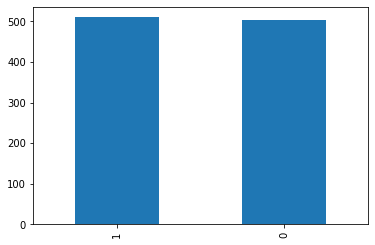

In [11]:
df['Liked'].value_counts().plot(kind='bar')
# df['Liked'].value_counts()

In [12]:
# dataset is balanced

In [13]:
# text preprocessing
# we have to remove special word,

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [15]:
nltk.download('stopwords')
# do st fo nltk

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [16]:
s_list=stopwords.words('english')

In [17]:
s_list
# so this are the stopwords for the english lang

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
# preprocessing
corpus=[]
for i in range(len(df)):
    # remove special characters and digit
    mystr=re.sub(r'[^a-zA-Z\s],','',df['Review'][i])
    # \s space ^ starting r is rw string 
    mystr=mystr.lower() # python is case censitiv so by BY diff coulum will create
    # tokenization
    list1=mystr.split()
    # remove stopwords
    list2=[ i for i in list1 if i not in s_list] 
    # stemming
    ps=PorterStemmer() # its obj of the porterstemmer
    list3=[ ps.stem(i) for i in list2]
    # convert into original string
    final=' '.join(list3)
    corpus.append(final)
    
    

In [19]:
corpus

['wow... love place.',
 'crust good.',
 'tasti textur nasty.',
 'stop late may bank holiday rick steve recommend love it.',
 'select menu great prices.',
 'get angri want damn pho.',
 'honeslti tast fresh.)',
 'potato like rubber could tell made ahead time kept warmer.',
 'fri great too.',
 'great touch.',
 'servic prompt.',
 'would go back.',
 'cashier care ever say still end wayyy overpriced.',
 'tri cape cod ravoli, chicken, cranberry...mmmm!',
 'disgust pretti sure human hair.',
 'shock sign indic cash only.',
 'highli recommended.',
 'waitress littl slow service.',
 'place worth time, let alon vegas.',
 'like all.',
 'burritto blah!',
 'food, amazing.',
 'servic also cute.',
 'could care less... interior beautiful.',
 'performed.',
 "that' right....th red velvet cake.....ohhh stuff good.",
 '- never brought salad ask for.',
 'hole wall great mexican street tacos, friendli staff.',
 'took hour get food 4 tabl restaur food luke warm, sever run around like total overwhelmed.',
 'wors

In [20]:
# vectorization

From the cleanest,potential features are extracted and are converted to numerical format.
the vectotized techniques are used to convert textual data to numerical format. using vectorization, a matrix is creaed where each column represents a freture and each row represents an individual review

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [24]:
X=cv.fit_transform(corpus).toarray()
y=df['Liked']
# toarray is a method to conver in array

In [25]:
X.shape

(1013, 1860)

In [26]:
df1=pd.DataFrame(X,columns=cv.get_feature_names_out())

In [27]:
df1

,00,10,100,11,12,15,17,1979,20,2007,...,yellowtail,yelpers,yet,you,yucky,yukon,yum,yummi,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# for using deployment purpose so pickel them

In [72]:
 # import pickle
 # f=open('pickle','wb')
 # pickle.dump(cv,f)
 # f.close()

In [30]:
# training and classificatiom

Training and Classification Further the data is splitted into training and testing set using Cross Validation technique. This data is used as input to classification algorithm.
Classification Algorithms:
Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.
Multinomial Naive Bayes Bernoulli Naive Bayes Logistic Regression

In [38]:
# splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)

In [32]:
# fitting Naive Bayes to the traing set 

In [39]:
from sklearn.naive_bayes import MultinomialNB
classifier1=MultinomialNB(alpha=0.1)
classifier1.fit(X_train,y_train)

MultinomialNB(alpha=0.1)

 in a jupyter environment,please rerun this cell to show the HTML represent or trust the notebook on GitHub, the HTML representatio in unbale to render,please try loading this page with nbviewer.org.

In [40]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[74 21]
 [31 77]]


In [41]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        95
           1       0.79      0.71      0.75       108

    accuracy                           0.74       203
   macro avg       0.75      0.75      0.74       203
weighted avg       0.75      0.74      0.74       203



Accuracy is  74.38 %
Precision is  0.79
Recall is  0.71


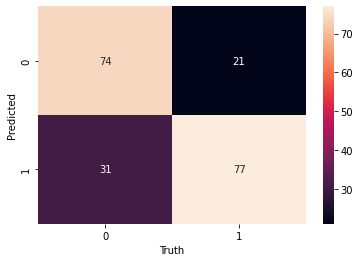

In [42]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

In [43]:
# Bernoullis used

In [45]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB(alpha=1.0)
classifier2.fit(X_train, y_train)

BernoulliNB()

In [46]:
# Predicting the Test set results
y_pred = classifier2.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)


Confusion Matrix:
 [[65 30]
 [26 82]]


In [47]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.68      0.70        95
           1       0.73      0.76      0.75       108

    accuracy                           0.72       203
   macro avg       0.72      0.72      0.72       203
weighted avg       0.72      0.72      0.72       203



Accuracy is  72.41 %
Precision is  0.73
Recall is  0.76


In [48]:
# logisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
classifier3 =LogisticRegression()
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
print('Classification Report\n', classification_report(y_test, y_pred))
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[75 20]
 [35 73]]
Classification Report
               precision    recall  f1-score   support

           0       0.68      0.79      0.73        95
           1       0.78      0.68      0.73       108

    accuracy                           0.73       203
   macro avg       0.73      0.73      0.73       203
weighted avg       0.74      0.73      0.73       203



Accuracy is  72.91 %
Precision is  0.78
Recall is  0.68


In [51]:
# classifier1(multinomial NB) is good model for next analysis with high precision 
# is given better precision

In [52]:
import pickle
f=open('classifier1','wb')
pickle.dump(classifier1,f)
f.close()

In [ ]:
# for deployment purpose
# pickle,classifier files are used

In [53]:
a=['bad taste']

In [54]:
a_cv=cv.transform(a)

In [55]:
classifier1.predict(a_cv)

array([0], dtype=int64)

In [56]:
a='not bad'
a_cv=cv.transform([a])
res=classifier1.predict(a_cv)

In [57]:
if 'not' in a:
    res[0]=abs(res[0]-1)
print(res[0])

1


In [58]:
# result and analysis

In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Two algorithms namely Multinomial Naive Bayes and Bernoulli Naive Bayes are implemented.

In [59]:
# by using flask

In [60]:
# By using GUI

In [61]:
foods = ["Idly", "Dosa", "Vada", "Roti", "Meals", "Veg Biryani",
         "Egg Biryani", "Chicken Biryani", "Mutton Biryani",
         "Ice Cream", "Noodles", "Manchooriya", "Orange juice",
         "Apple Juice", "Pineapple juice", "Banana juice"]
len(foods)

16

In [67]:
import mysql.connector
conn=mysql.connector.connect(user='root',password='pallavi',host='localhost')
qur='create database project5'
mycur=conn.cursor()
mycur.execute(qur)
mycur.close()
conn.close()

In [69]:
import mysql.connector
conn=mysql.connector.connect(user='root',password='pallavi',host='localhost',database='project5')
qur='create table project2(food VARCHAR(40),good_review INT,bad_review INT,customer INT)'
mycur=conn.cursor()
mycur.execute(qur)
mycur.close()
conn.close()

In [71]:
 for i in foods:
     conn=mysql.connector.connect(user='root',password='pallavi',host='localhost',database='project5')
     qur='INSERT INTO project2(food,good_review,bad_review,customer) VALUES("%s",%d,%d,%d)'%(i,0,0,0)
     mycur=conn.cursor()
     mycur.execute(qur)
     conn.commit()
     mycur.close()
     conn.close()